# Analisando os Sentimentos na Discografia do Fifth Harmony
A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [ ]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Carregando arquivo com as músicas da Banda

O arquivo CSV foi gerado no notebook *FifthHarmony_Songs*, contendo informações detalhadas sobre as músicas da famosa girl group. O dataset inclui dados como título das faixas, álbum e ano de lançamento através da API Genius. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [ ]:
# Leitura do Arquivo
df=pd.read_csv("FifthHarmonyLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Renomeia os valores da coluna 'Album' para melhor usabilidade dos dados
df['Album'] = df['Album'].replace({
    '7/27 (Japan Deluxe Edition)': '7/27',
    '7/27 (Napster Edition)': '7/27',
    'Reflection (Japan Deluxe Edition)': 'Reflection',
    'The Star (Original Motion Picture Soundtrack)': 'The Star'
})

df

title  \
0               Work From Home   
1                     Worth It   
2                         Down   
3               That’s My Girl   
4        All in My Head (Flex)   
5                 He Like That   
6        Don’t Say You Love Me   
7                        Angel   
8                         BO$$   
9                       No Way   
10                Sledgehammer   
11                        Dope   
12                    The Life   
13                 Write On Me   
14                Big Bad Wolf   
15                     Deliver   
16                  Reflection   
17  I’m in Love with a Monster   
18                      I Lied   
19              Miss Movin’ On   
20            Gonna Get Better   
21                 Who Are You   
22                Lonely Night   
23    Brave, Honest, Beautiful   
24                  1000 Hands   
25                     Bridges   
26                   Sauced Up   
27                     Squeeze   
28                Make You Mad   
29             Scared of Happy   
30                       Messy   
31         Not That Kinda Girl   
32                     We Know   
33                 Like Mariah   
34               Me & My Girls   
35             Better Together   
36                 Can You See   
37                   Voicemail   
38                    Top Down   
39               Going Nowhere   
40          Them Girls Be Like   
41         This is How We Roll   
42            Everlasting Love   
43     Don’t Wanna Dance Alone   
44                   Suga Mama   

                                               lyrics          Album  \
0    camila worried nothin wearin nada sittin pret...           7/27   
1    camila give worth baby worth worth gimme gimm...     Reflection   
2    gucci mane gucci fifth harmony  lauren need s...  Fifth Harmony   
3    camila that girl  ally ally camila yeah worki...           7/27   
4    dinah flex time impress come climb thing head...           7/27   
5    ally normani pumps bump pumps bump  dinah goo...  Fifth Harmony   
6    lauren miss when call hurting without scars p...  Fifth Harmony   
7    normani lauren said angel said angel yeah  no...  Fifth Harmony   
8     normani every payday swipe card talking lady...     Reflection   
9    lauren know want anymore look face they when ...           7/27   
10   camila meghan trainor could take pulse right ...     Reflection   
11   camila  camila jersey tongue saying much feel...           7/27   
12   camila ally ally lauren fifth harmony yeah ye...           7/27   
13   normani pick paper write skin bring life star...           7/27   
14   ally kiss kiss lips racing baby guilty wherev...           7/27   
15   lauren know keep ready regular ready settin w...  Fifth Harmony   
16   camila yeah  dinah camila must confess lookin...     Reflection   
17   lauren  lauren dinah thorn rose covered dirt ...     Reflection   
18   lauren crazy four letter word gets tossed gui...           7/27   
19   camila lauren breaking down gonna start scrat...     Reflection   
20   ally gonna leave know better gonna leave know...           7/27   
21   camila  lauren normani monday sent flowers tu...     Reflection   
22   normani attention yeah better listen cause qu...  Fifth Harmony   
23   normani flict lauren ready normani ready cami...     Reflection   
24   camila tired tired yeah  camila normani give ...           7/27   
25   ally dinah spend time rewind sorry many times...  Fifth Harmony   
26   ally lauren sauced forever young never cause ...  Fifth Harmony   
27   normani camila night looking wish could read ...           7/27   
28   make make  normani ally blood veins work baby...  Fifth Harmony   
29   lauren since lost words needles static stutte...           7/27   
30   dinah tell straight feel filter touchin there...  Fifth Harmony   
31   normani come  normani pull what benz tellin m...           7/27   
32   normani same words thirst different name same...     Reflection   
33   tyga do

In [ ]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['camila', 'lauren', 'normani', 'lauren', 'ally', 'dinah', 'yeah', 'na']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 8344 palavras no dataset de letra.
Existem 1121 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e insights iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

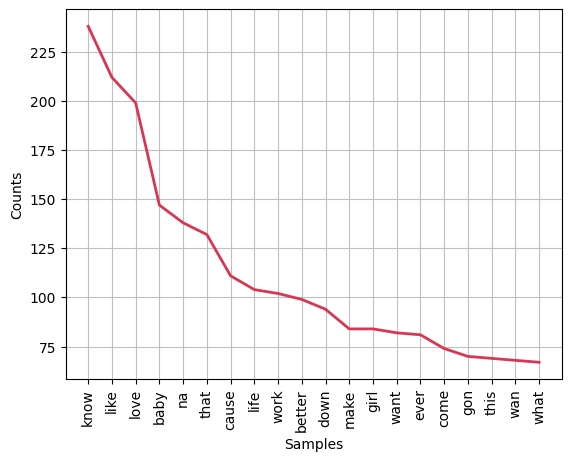

In [ ]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia da banda.
</div>

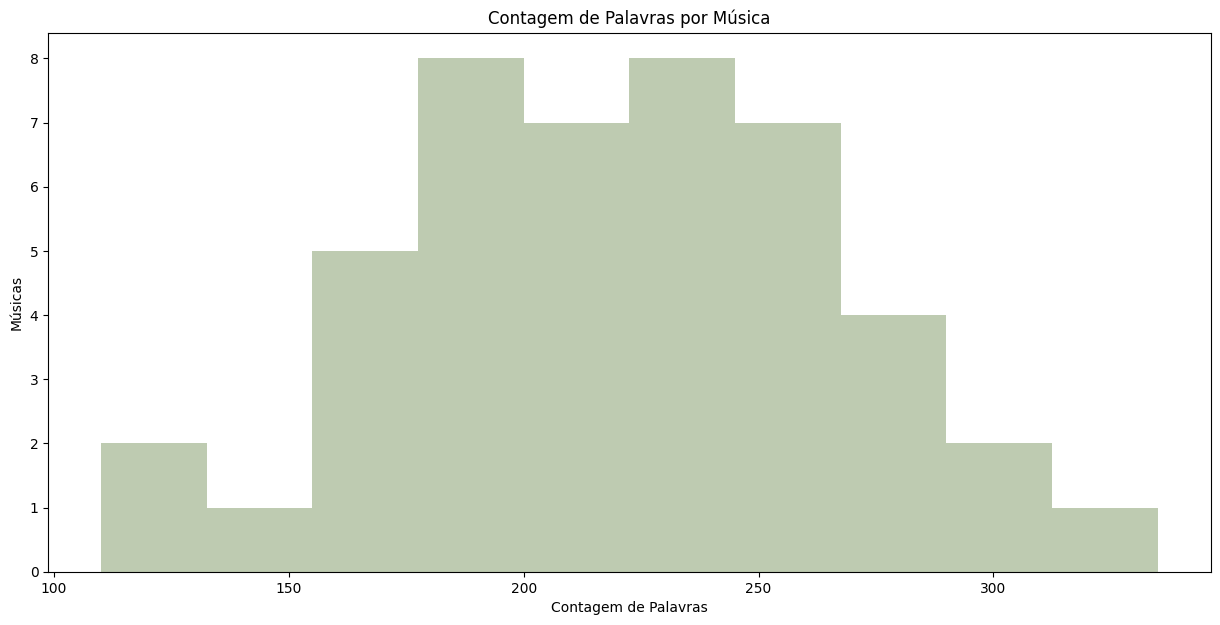

In [ ]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

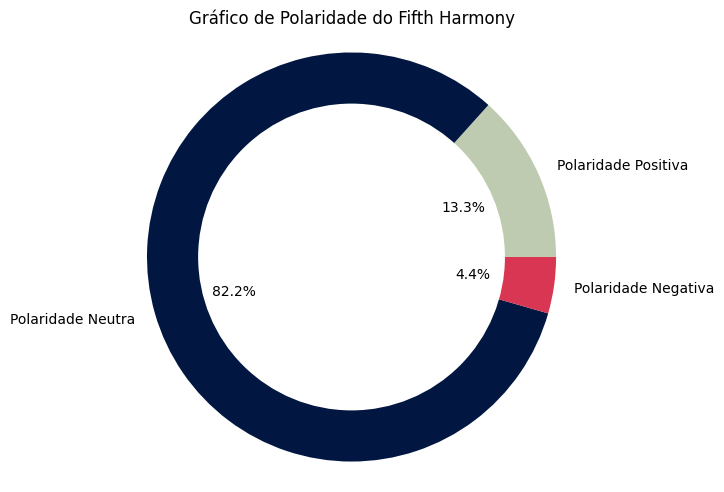

In [ ]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do Fifth Harmony')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia da banda apresenta apenas 4.4% de polaridade negativa, mostrando que a maioria de suas composições estão relacionadas á temas como amor, empoderamento e confiança.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


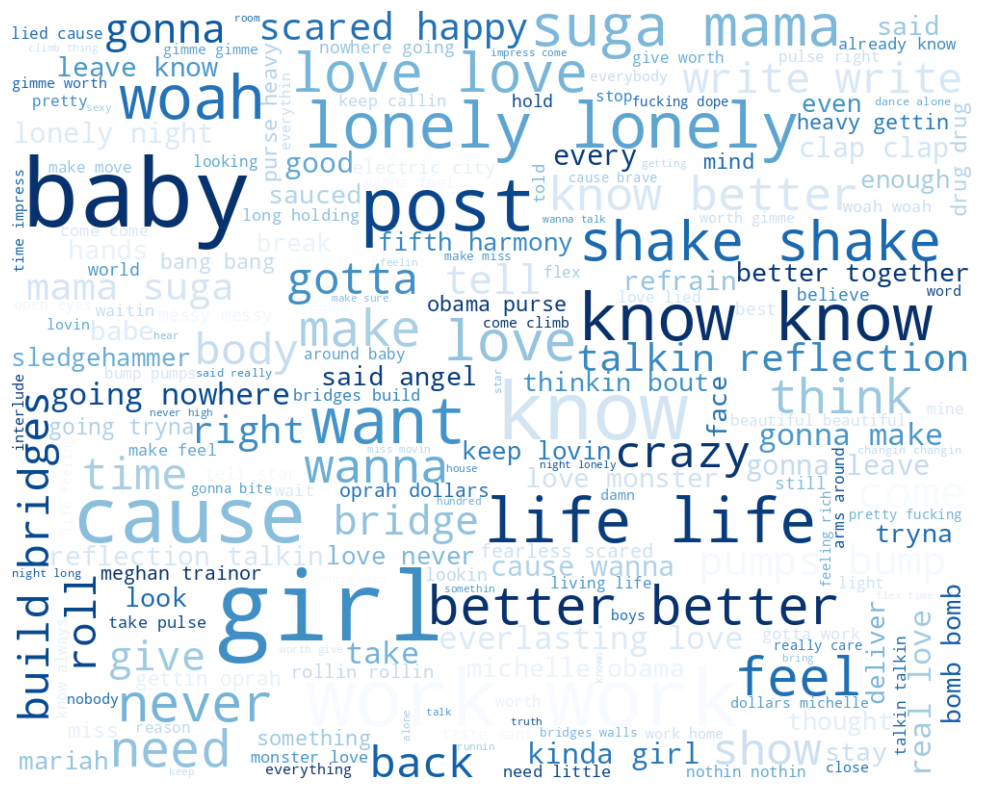

In [ ]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [ ]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()
df_original_3 = df_original_2.copy()

# Exibir resultado
df

title  \
0               Work From Home   
1                     Worth It   
2                         Down   
3               That’s My Girl   
4        All in My Head (Flex)   
5                 He Like That   
6        Don’t Say You Love Me   
7                        Angel   
8                         BO$$   
9                       No Way   
10                Sledgehammer   
11                        Dope   
12                    The Life   
13                 Write On Me   
14                Big Bad Wolf   
15                     Deliver   
16                  Reflection   
17  I’m in Love with a Monster   
18                      I Lied   
19              Miss Movin’ On   
20            Gonna Get Better   
21                 Who Are You   
22                Lonely Night   
23    Brave, Honest, Beautiful   
24                  1000 Hands   
25                     Bridges   
26                   Sauced Up   
27                     Squeeze   
28                Make You Mad   
29             Scared of Happy   
30                       Messy   
31         Not That Kinda Girl   
32                     We Know   
33                 Like Mariah   
34               Me & My Girls   
35             Better Together   
36                 Can You See   
37                   Voicemail   
38                    Top Down   
39               Going Nowhere   
40          Them Girls Be Like   
41         This is How We Roll   
42            Everlasting Love   
43     Don’t Wanna Dance Alone   
44                   Suga Mama   

                                               lyrics          Album  \
0   worried nothin wearin nada sittin pretty impat...           7/27   
1   give worth baby worth worth gimme gimme worth ...     Reflection   
2   gucci mane gucci fifth harmony need somebody p...  Fifth Harmony   
3   that girl working damn hard head overload flaw...           7/27   
4   flex time impress come climb thing head fetty ...           7/27   
5   pumps bump pumps bump good attitude kinda like...  Fifth Harmony   
6   miss when call hurting without scars promise t...  Fifth Harmony   
7   said angel said angel moment nothin serious ne...  Fifth Harmony   
8   every payday swipe card talking lady want kany...     Reflection   
9   know want anymore look face they when rains po...           7/27   
10  meghan trainor could take pulse right would fe...     Reflection   
11  jersey tongue saying much feeling attitude tha...           7/27   
12  fifth harmony ever since young tryna right eve...           7/27   
13  pick paper write skin bring life start again t...           7/27   
14  kiss kiss lips racing baby guilty wherever ang...           7/27   
15  know keep ready regular ready settin when give...  Fifth Harmony   
16  must confess looking fresh fresh impressed hea...     Reflection   
17  thorn rose covered dirt covered gold trying ti...     Reflection   
18  crazy four letter word gets tossed guilty said...           7/27   
19  breaking down gonna start scratch shake like e...     Reflection   
20  gonna leave know better gonna leave know bette...           7/27   
21  monday sent flowers tuesday made feel stupid w...     Reflection   
22  attention better listen cause questions late n...  Fifth Harmony   
23  flict ready ready ready jane fifth harmony was...     Reflection   
24  tired tired give nothin ever tried perfect som...           7/27   
25  spend time rewind sorry many times remind myse...  Fifth Harmony   
26  sauced forever young never cause sauced like w...  Fifth Harmony   
27  night looking wish could read mind dimming lig...           7/27   
28  make make blood veins work baby baby know what...  Fifth Harmony   
29  since lost words needles static stutters never...           7/27   
30  tell straight feel filter touchin there filter...  Fifth Harmony   
31  come pull what benz tellin money spend wanna s...           7/27   
32  same words thirst different name same jokes la...     Reflection   
33  tyga doo

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e sepração de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

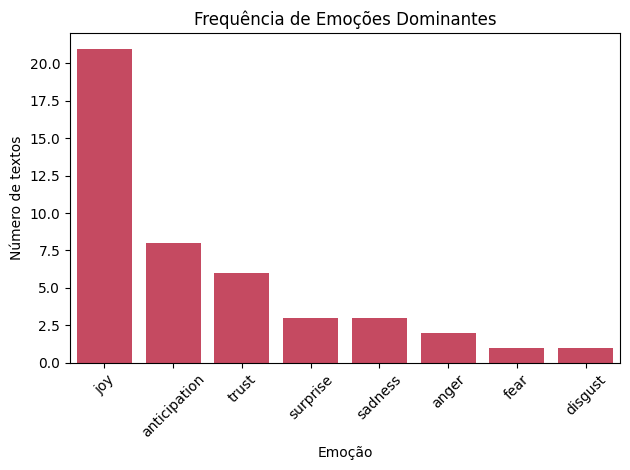

In [ ]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui Alegria, Antipatia e Confiança como emoções mais presentes.
</div>

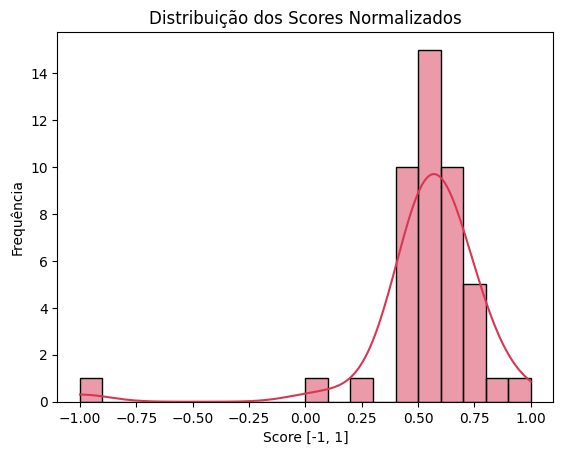

In [ ]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A maioria dos scores está entre 0.4 e 0.7, o que indica que as emoções predominantes nos textos analisados são positivas. Há uma leve assimetria negativa (cauda à esquerda), o que significa que, apesar da maior parte ser positiva, há uma quantidade pequena de sentimentos neutros ou levemente negativos. Por fim, Há pouquíssimos valores extremos abaixo de 0 (negativos) e próximos de -1. Isso sugere que sentimentos fortemente negativos são raros nas letras/textos analisados.
</div>

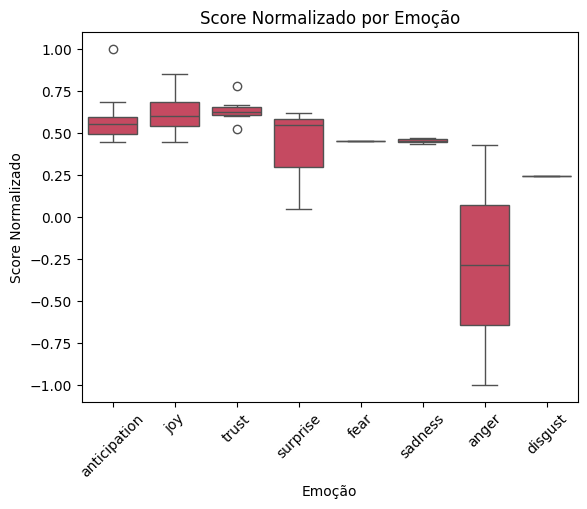

In [ ]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.
- `joy`, `trust` e `anticipation` têm medianas acima de 0.5, o que reforça que essas emoções estão associadas a **sentimentos positivos** nas músicas.
- `anger` apresenta a **menor mediana** e a maior dispersão — variando até valores negativos próximos de -1. Ou seja, letras com essa emoção têm **forte conotação negativa**.
- - `sadness` e `disgust` também têm scores bem mais baixos comparados às outras emoções.



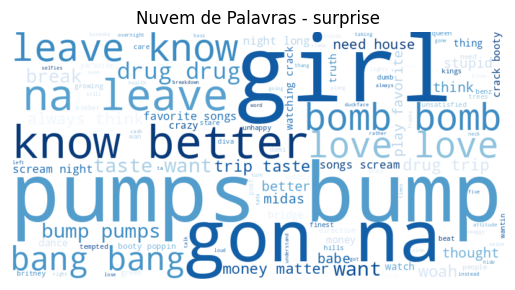

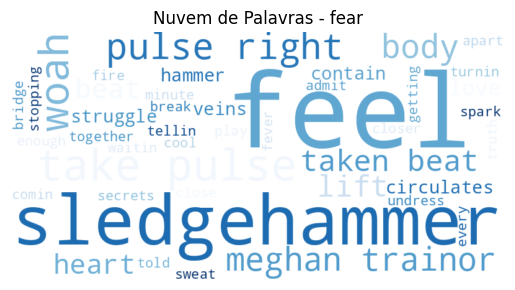

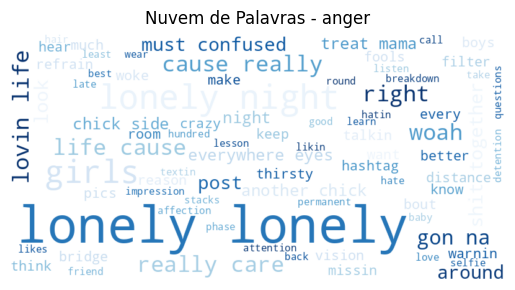

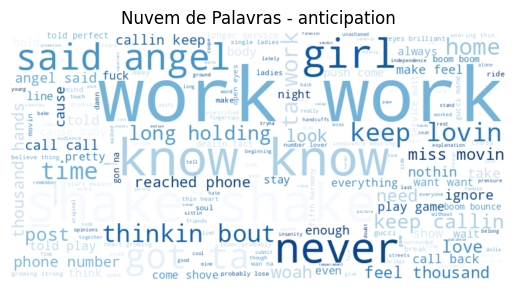

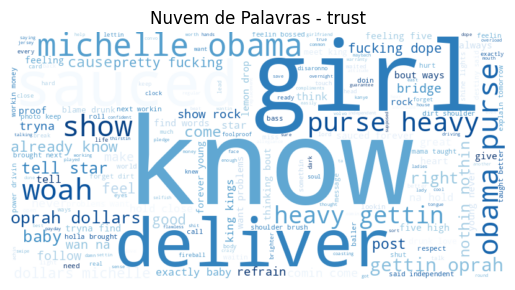

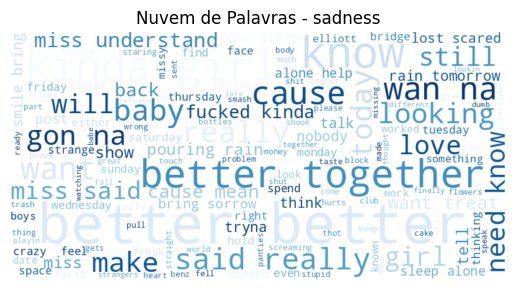

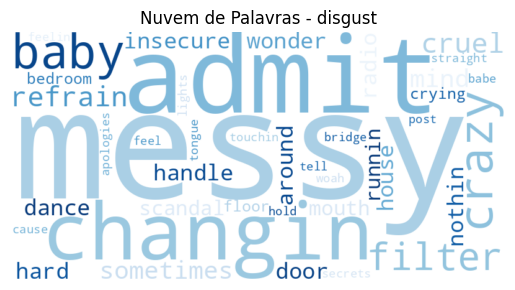

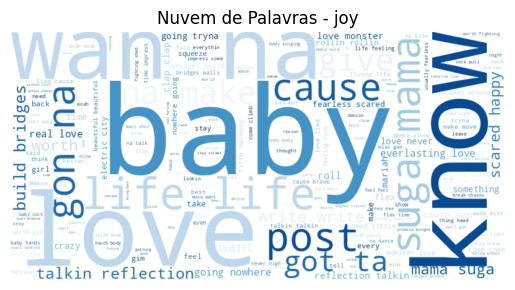

In [ ]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

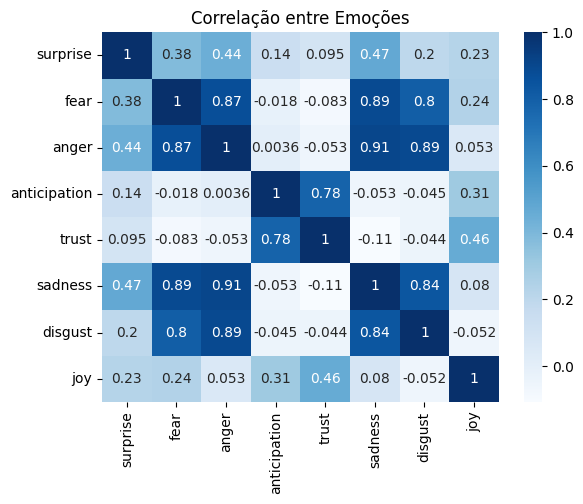

In [ ]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

O **heatmap de correlação entre emoções** é super útil para entender **como diferentes emoções aparecem juntas nas letras analisadas**. Logo:

#### Emoções que aparecem juntas com frequência
- **Anger & Sadness** → 0.91  
  Letras com raiva quase sempre têm tristeza também. Isso sugere que muitas músicas misturam essas emoções, talvez em contextos de **desilusão, frustração ou perda**.

- **Fear & Disgust** → 0.89  
  Músicas que expressam medo geralmente trazem nojo também — provavelmente ligadas a **temas de rejeição, trauma ou dor emocional**.

- **Sadness & Disgust** → 0.84  
  Um padrão parecido com o anterior — letras negativas tendem a combinar emoções mais densas.

- **Anticipation & Trust** → 0.78  
  Quando há expectativa, também há confiança. Isso pode refletir letras mais **esperançosas ou inspiradoras**.

#### Emoções com **baixa correlação**
- **Joy & Disgust** → -0.052  
  Como esperado, **felicidade e nojo não andam juntas**.

- **Joy & Sadness** → 0.08  
  Aparecem raramente juntas. O que é coerente: músicas tendem a ser claramente tristes ou alegres, raramente mesclando essas emoções opostas.

- **Trust & Sadness** → -0.11  
  Também é interessante: letras com confiança tendem a não envolver tristeza — pode refletir músicas com mensagens **positivas, otimistas e de superação**.

## Análise da Era Reflection

Reflection é o álbum de estreia da girl group pop. Lançado em 3 de fevereiro de 2015 pela Epic Records e Syco Music. A lista de faixas oficial do álbum foi revelada no Snapchat do grupo em 8 de janeiro de 2015. As vendas da primeira semana do álbum em solo americano foi de 80.000 unidades.

**Observação:** Na API Genius o EP Better Together foi anexado ao álbum, logo, a análise do EP será juntamente com o disco.

Mais informações: https://pt.wikipedia.org/wiki/Reflection_(%C3%A1lbum)

In [ ]:
# Filtrando o DataFrame pelo álbum Reflection
df_reflection = df[df['Album'] == 'Reflection']

# Exibindo o DataFrame filtrado
df_reflection

title  \
1                     Worth It   
8                         BO$$   
10                Sledgehammer   
16                  Reflection   
17  I’m in Love with a Monster   
19              Miss Movin’ On   
21                 Who Are You   
23    Brave, Honest, Beautiful   
32                     We Know   
33                 Like Mariah   
34               Me & My Girls   
35             Better Together   
38                    Top Down   
39               Going Nowhere   
40          Them Girls Be Like   
41         This is How We Roll   
42            Everlasting Love   
43     Don’t Wanna Dance Alone   
44                   Suga Mama   

                                               lyrics       Album  \
1   give worth baby worth worth gimme gimme worth ...  Reflection   
8   every payday swipe card talking lady want kany...  Reflection   
10  meghan trainor could take pulse right would fe...  Reflection   
16  must confess looking fresh fresh impressed hea...  Reflection   
17  thorn rose covered dirt covered gold trying ti...  Reflection   
19  breaking down gonna start scratch shake like e...  Reflection   
21  monday sent flowers tuesday made feel stupid w...  Reflection   
23  flict ready ready ready jane fifth harmony was...  Reflection   
32  same words thirst different name same jokes la...  Reflection   
33  tyga doop doop doop doop doop doop love call b...  Reflection   
34  play favorite songs scream night long like whe...  Reflection   
35  when together strangers playin around wanna wo...  Reflection   
38  blaze cruisin down engine cruisin watch down t...  Reflection   
39  flict first give girl credit keep lovin cause ...  Reflection   
40  look should call back wear hair like that make...  Reflection   
41  this roll stay street week cause this roll got...  Reflection   
42  ever ever ever ever ever ever fifth harmony ba...  Reflection   
43  callin girls there tonight hundred percent eve...  Reflection   
44  flict know want tell want lady deny sexy what ...  Reflection   

    release_year  Word Count     score     sentiment   filter  
1           2015         244  0.587209           joy  intenso  
8           2014         214  0.662791         trust  intenso  
10          2014         212  0.453488          fear  intenso  
16          2015         218  0.645349           joy  intenso  
17          2015         228  0.511628           joy  intenso  
19          2013         159  0.558140  anticipation  intenso  
21          2013         190  0.436047       sadness  intenso  
23          2015         254  0.598837           joy  intenso  
32          2015         158  0.447674  anticipation  intenso  
33          2015         269  0.662791           joy  intenso  
34          2013         183  0.546512      surprise  intenso  
35          2013         222  0.453488       sadness  intenso  
38          2015         174  0.715116           joy  intenso  
39          2015         256  0.581395           joy  intenso  
40          2014         180  0.424419         anger  intenso  
41          2015         301  0.732558           joy  intenso  
42          2015         250  0.784884           joy  intenso  
43          2013         199  0.540698           joy  intenso  
44          2015         229  0.680233           joy  intenso

In [ ]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_reflection['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 3549 palavras no dataset de letra.
Existem 648 palavras únicas no dataset de letras.


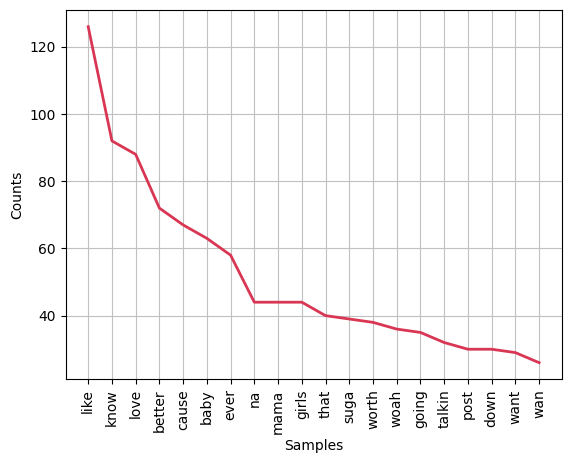

In [ ]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

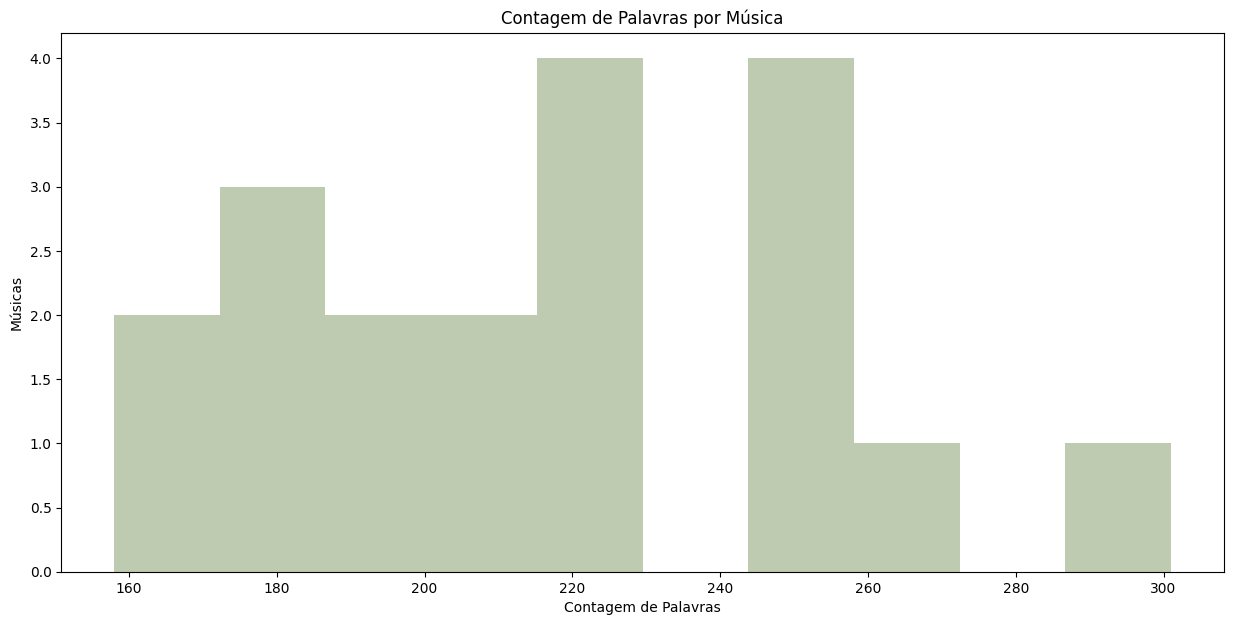

In [ ]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_reflection
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_reflection['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

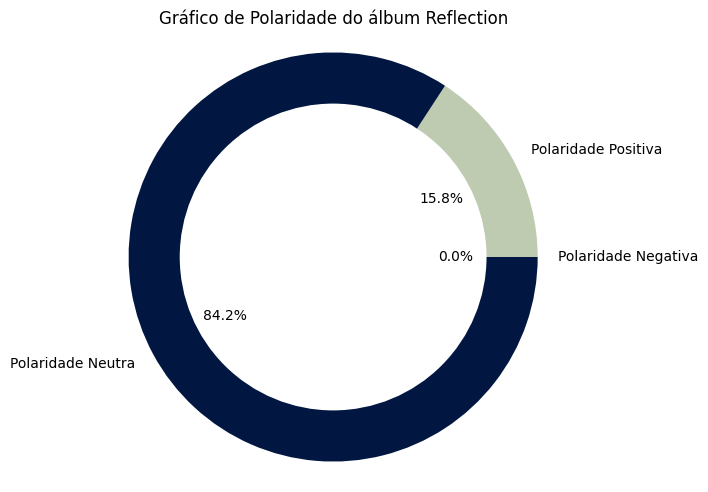

In [ ]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_reflection['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_reflection['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Reflection')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O álbum Reflection não possui grau negativo.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-239-dfc24a7be2ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reflection['lyrics'] = df_reflection['lyrics'].fillna('')  # Substitui valores nulos por string vazia


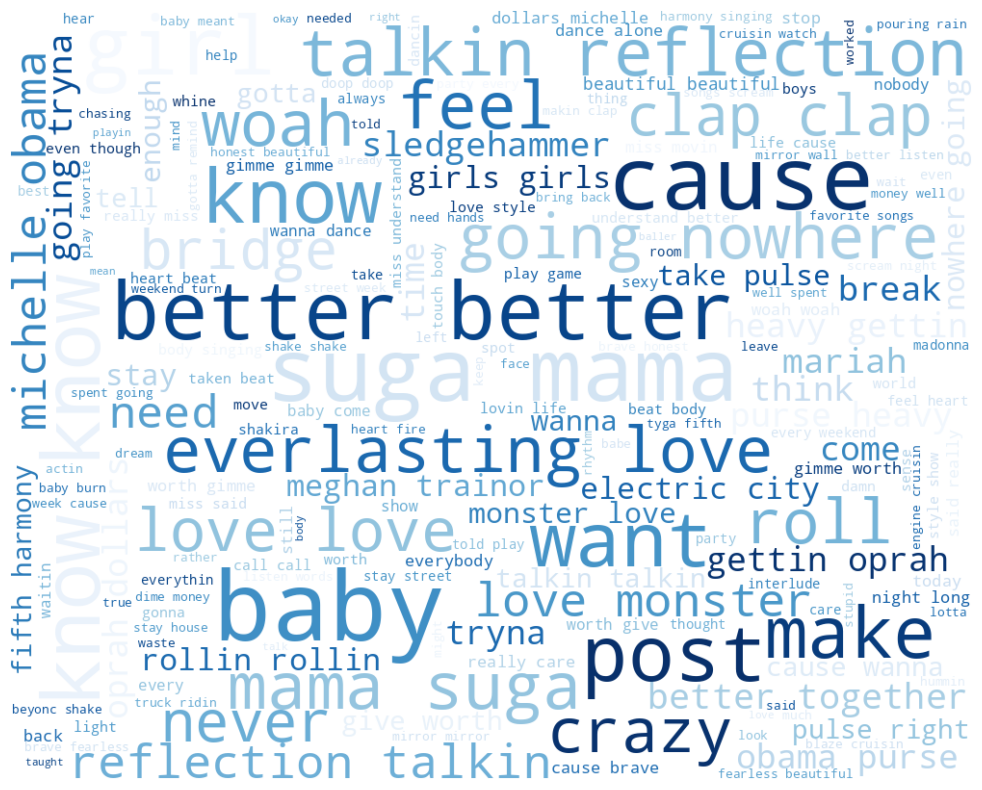

In [ ]:
# Exibir os nomes das colunas do DataFrame
print(df_reflection.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_reflection.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_reflection['lyrics'] = df_reflection['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_reflection['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

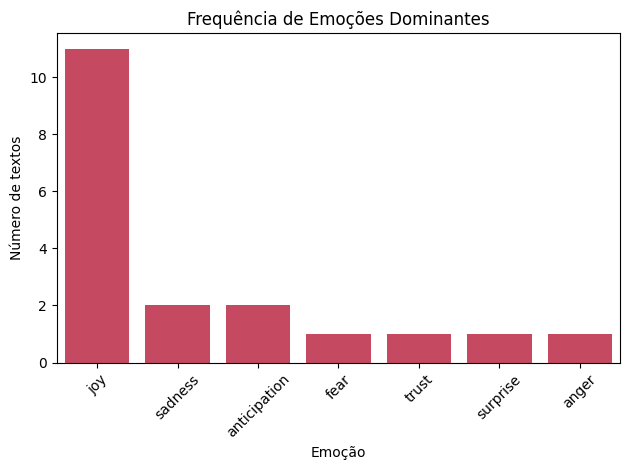

In [ ]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_reflection,
    order=df_reflection['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O álbum possui um equilíbrio emocional intenso.
</div>

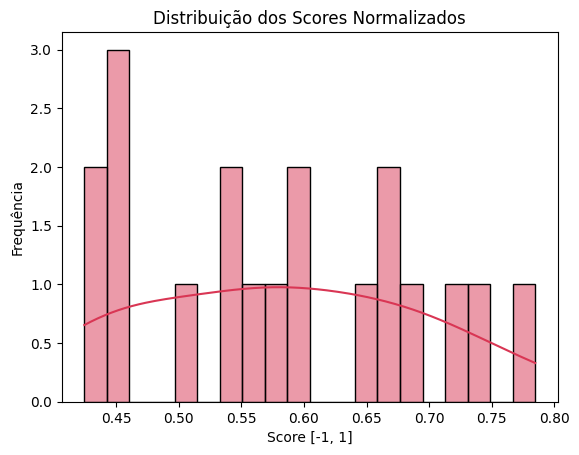

In [ ]:
## Construção do Histograma
sns.histplot(df_reflection['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A maioria dos scores está entre 0.55 e 0.6, o que indica que as emoções predominantes nos textos analisados são positivas. Não existe assimetria negativa.
</div>

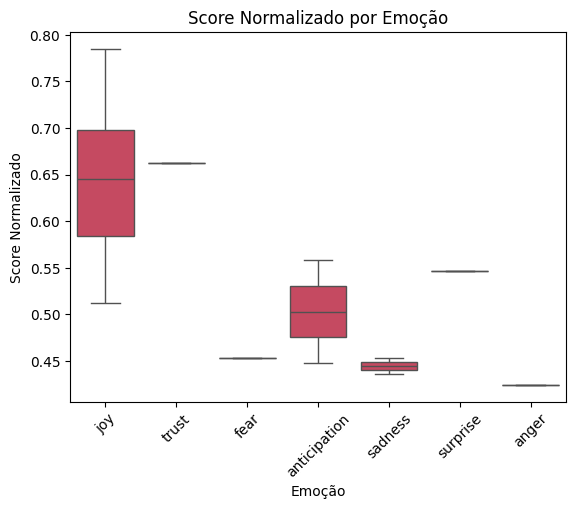

In [ ]:
sns.boxplot(x='sentiment', y='score', data=df_reflection, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

- A emoção **"joy" (alegria)** apresenta os maiores valores normalizados, sendo predominante nas músicas do álbum.
- **"Trust" (confiança)** também se destaca com altos escores, indicando temas de segurança, vínculo e apoio nas letras.
- Emoções como **"anger" (raiva)** e **"disgust" (aversão)** não aparecem ou têm presença nula/negligenciável.
- As demais emoções, como **"fear"**, **"sadness"** e **"anticipation"**, possuem escores menores e mais concentrados, demonstrando menor influência nas composições.

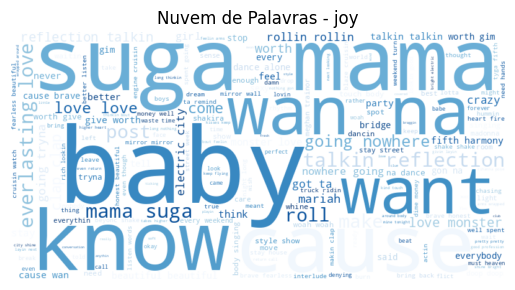

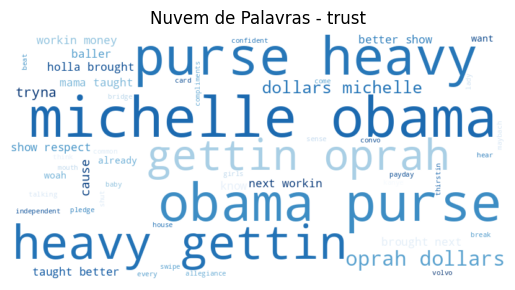

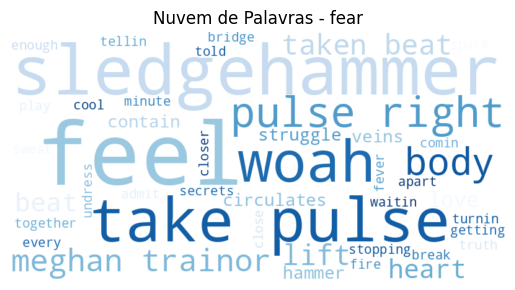

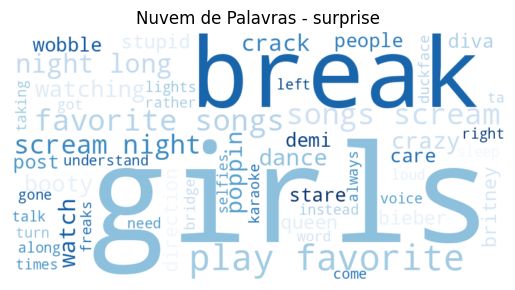

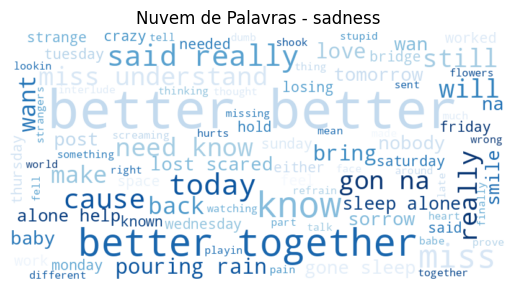

Nenhuma letra encontrada para a emoção 'disgust'.


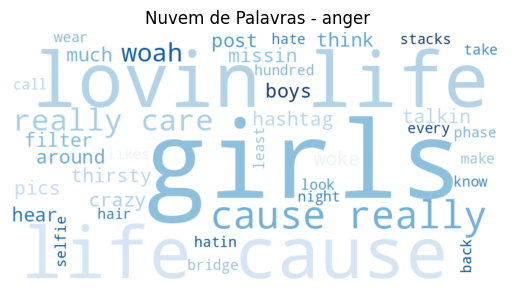

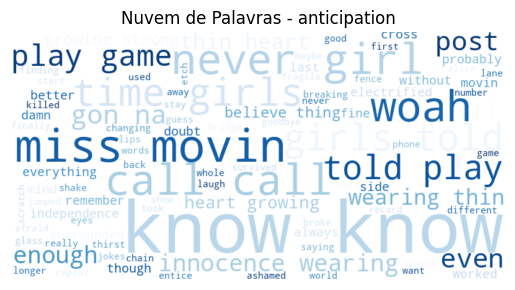

In [ ]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_reflection[df_reflection['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

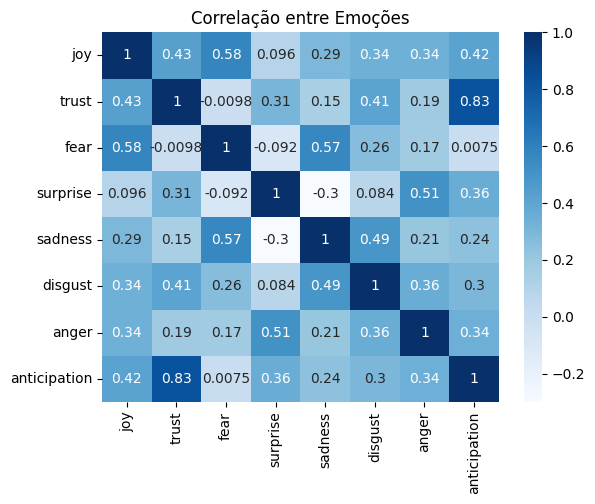

In [ ]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_reflection['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Em resumo, o álbum Reflection apresenta uma coesão emocional entre sentimentos positivos (alegria, confiança e antecipação), enquanto emoções negativas têm baixa correlação e menos presença nas letras.
</div>

## Análise da Era 7/27

7/27 é o segundo álbum de estúdio do girl group estadunidense. Ele foi lançado em 27 de maio de 2016 através das gravadoras Syco Music e Epic Records. Esse é o último álbum lançado com a integrante Camila Cabello antes da sua saída do grupo em dezembro de 2016. O álbum tem participações vocais de Ty Dolla Sign, Missy Elliott e Fetty Wap.

O título do álbum refere-se a 27 de Julho de 2012, data em que o grupo foi formado no reality show estadunidense The X Factor. No Metacritic , que atribui uma avaliação normalizada em 100 a opiniões de críticos dominantes, o álbum recebeu uma pontuação média de 70, o que indica "avaliações favoráveis", baseado em 7 avaliações.

Mais informações no link: https://pt.wikipedia.org/wiki/7/27

In [ ]:
# Filtrando o DataFrame pelo álbum 7/27
df_727= df_original[df_original['Album'] == '7/27']

# Exibindo o DataFrame filtrado
df_727

title                                             lyrics  \
0          Work From Home  worried nothin wearin nada sittin pretty impat...   
3          That’s My Girl  that girl working damn hard head overload flaw...   
4   All in My Head (Flex)  flex time impress come climb thing head fetty ...   
9                  No Way  know want anymore look face they when rains po...   
11                   Dope  jersey tongue saying much feeling attitude tha...   
12               The Life  fifth harmony ever since young tryna right eve...   
13            Write On Me  pick paper write skin bring life start again t...   
14           Big Bad Wolf  kiss kiss lips racing baby guilty wherever ang...   
18                 I Lied  crazy four letter word gets tossed guilty said...   
20       Gonna Get Better  gonna leave know better gonna leave know bette...   
24             1000 Hands  tired tired give nothin ever tried perfect som...   
27                Squeeze  night looking wish could read mind dimming lig...   
29        Scared of Happy  since lost words needles static stutters never...   
31    Not That Kinda Girl  come pull what benz tellin money spend wanna s...   
37              Voicemail  reached phone number longer service wait call ...   

   Album  release_year  Word Count     score     sentiment   filter  
0   7/27          2016         246  0.540698  anticipation  intenso  
3   7/27          2016         268  0.616279         trust  intenso  
4   7/27          2016         236  0.470930           joy   neutro  
9   7/27          2016         120  0.488372  anticipation   neutro  
11  7/27          2016         222  0.523256         trust  intenso  
12  7/27          2016         335  0.622093           joy  intenso  
13  7/27          2016         170  0.529070           joy  intenso  
14  7/27          2016         237  0.447674           joy  intenso  
18  7/27          2016         221  0.848837           joy  intenso  
20  7/27          2016         246  0.616279      surprise  intenso  
24  7/27          2016         110  0.494186  anticipation  intenso  
27  7/27          2016         141  0.639535           joy  intenso  
29  7/27          2016         206  0.784884           joy  intenso  
31  7/27          2016         243  0.470930       sadness   neutro  
37  7/27          2016         282  0.563953  anticipation  intenso

In [ ]:
# Lista de palavras indesejadas presentes na discografia
indesejadas = ['camila', 'lauren', 'normani', 'lauren', 'ally', 'dinah', 'yeah']

# Remove palavras indesejadas, e salva de volta como um texto longo
df_727['lyrics'] = df_727['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_727['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 2789 palavras no dataset de letra.
Existem 523 palavras únicas no dataset de letras.


<ipython-input-249-709166f0d49a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_727['lyrics'] = df_727['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))


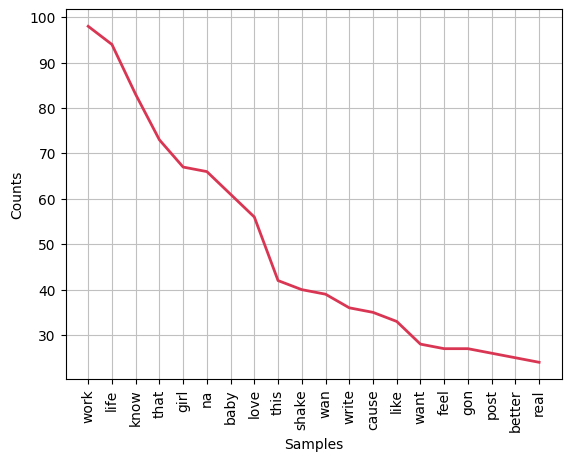

In [ ]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

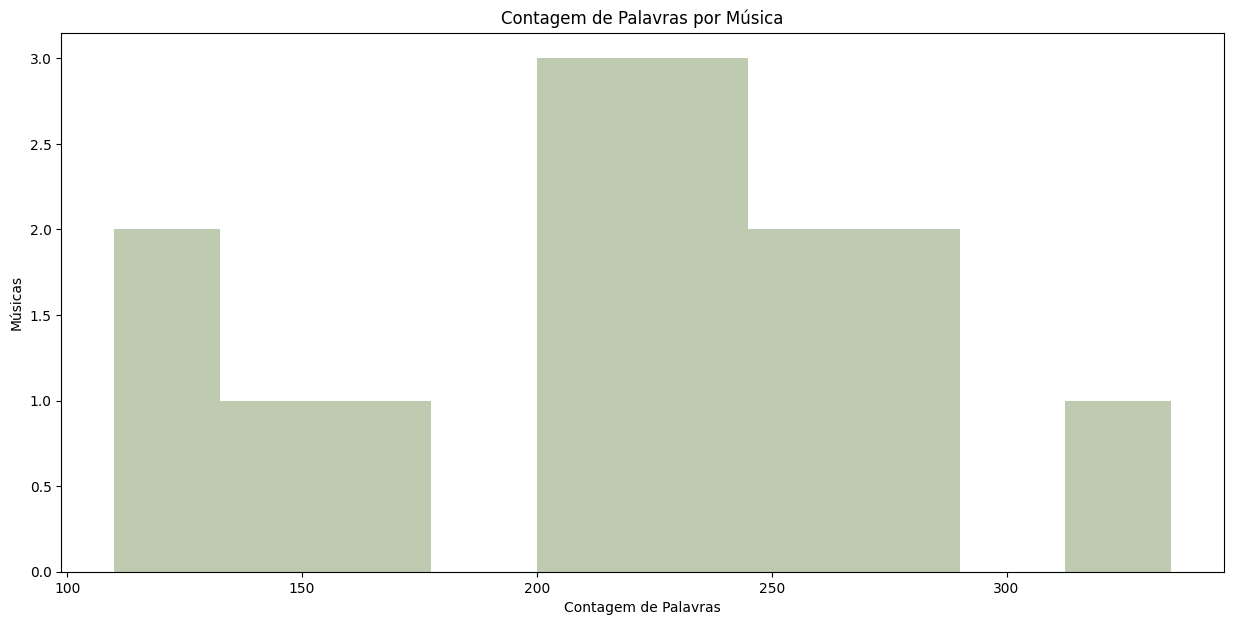

In [ ]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_reflection
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_727['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

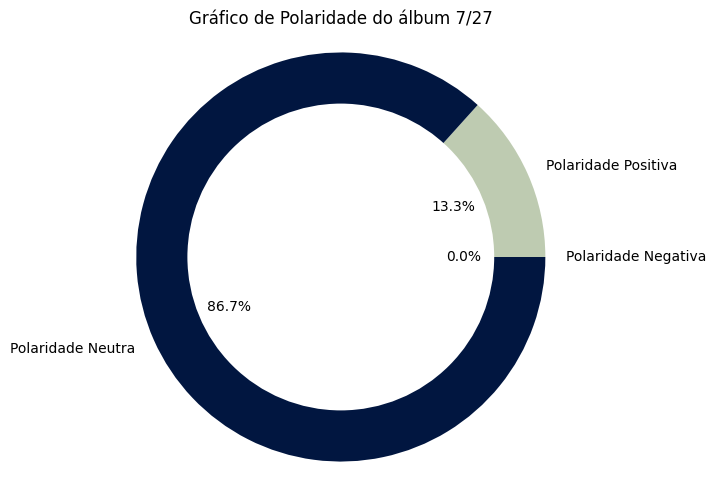

In [ ]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_727['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_727['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum 7/27')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O álbum manteve a mesma similaridade com a o álbum anterior, deduzindo-se que mantiveram as estratégias de composição.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-252-8b2e4dffc428>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_727['lyrics'] = df_727['lyrics'].fillna('')  # Substitui valores nulos por string vazia


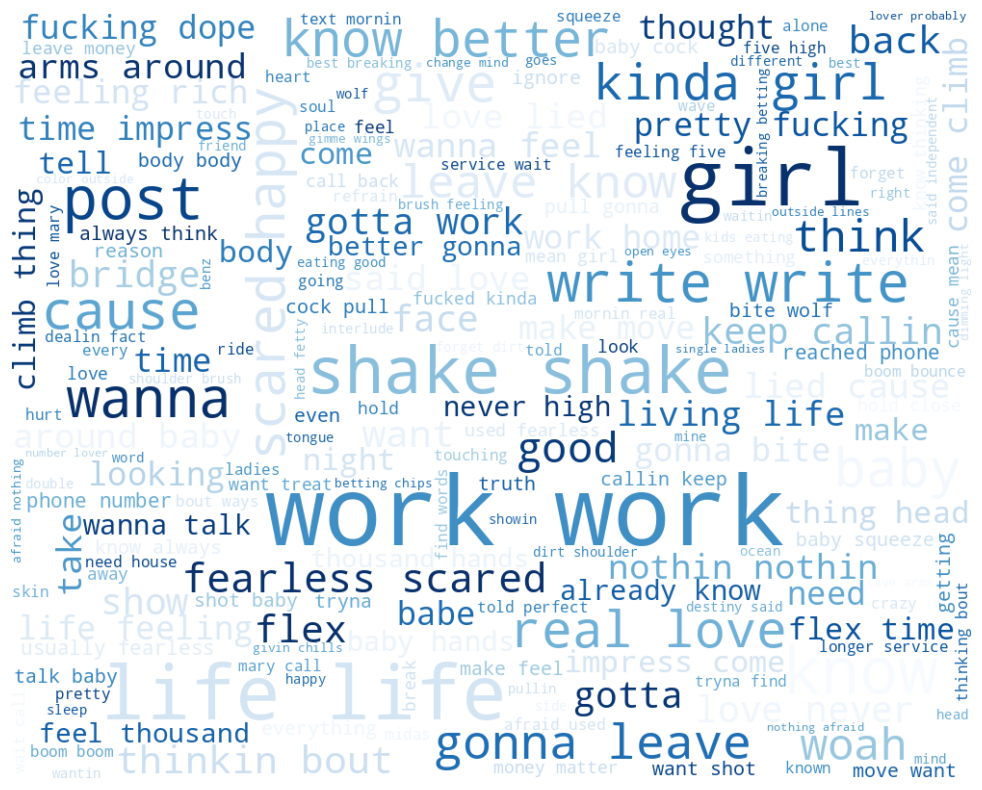

In [ ]:
# Exibir os nomes das colunas do DataFrame
print(df_727.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_727.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_727['lyrics'] = df_727['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_727['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

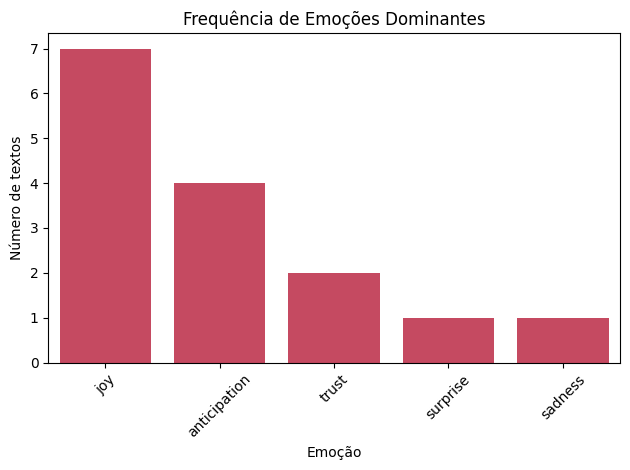

In [ ]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_727,
    order=df_727['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Mesmos resultados do álbum anterior, mantendo o mesmo conceito musical como fórmula de sucesso.
</div>

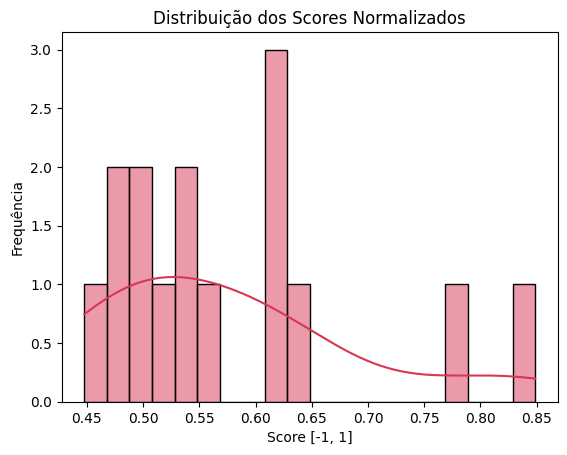

In [ ]:
# Gerando o Histograma
sns.histplot(df_727['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

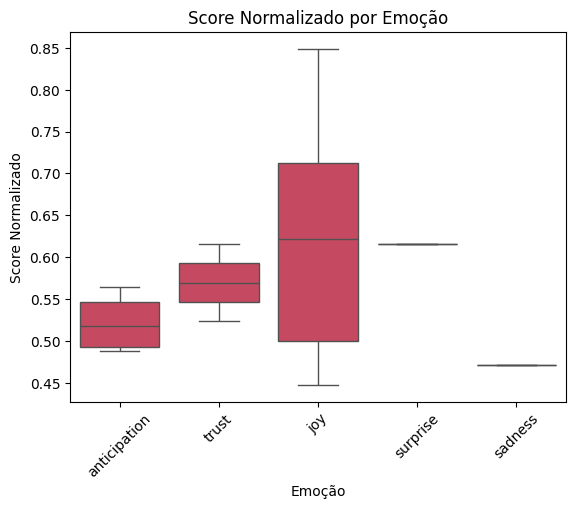

In [ ]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_727, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

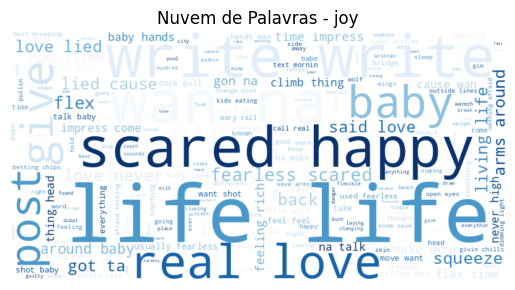

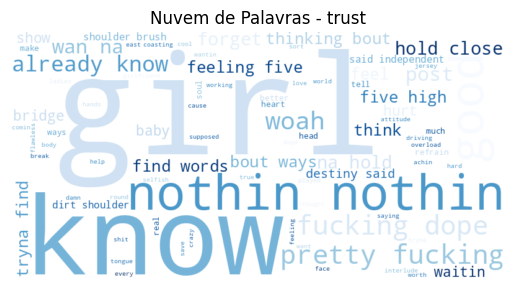

Nenhuma letra encontrada para a emoção 'fear'.


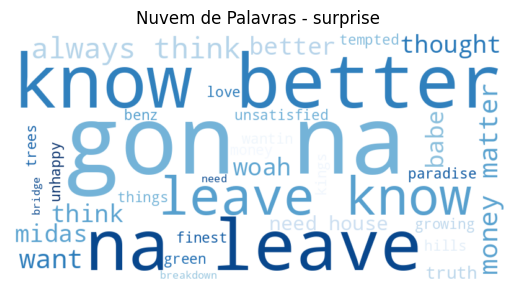

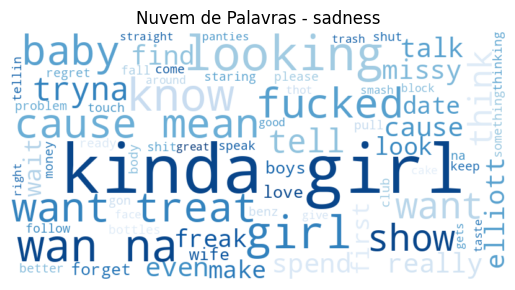

Nenhuma letra encontrada para a emoção 'disgust'.
Nenhuma letra encontrada para a emoção 'anger'.


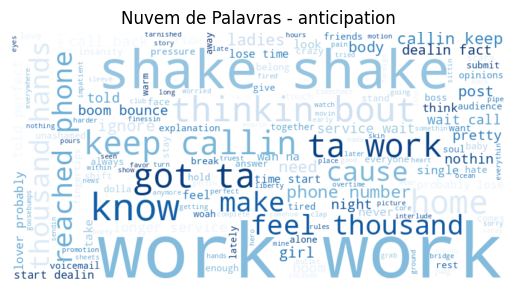

In [ ]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_727[df_727['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

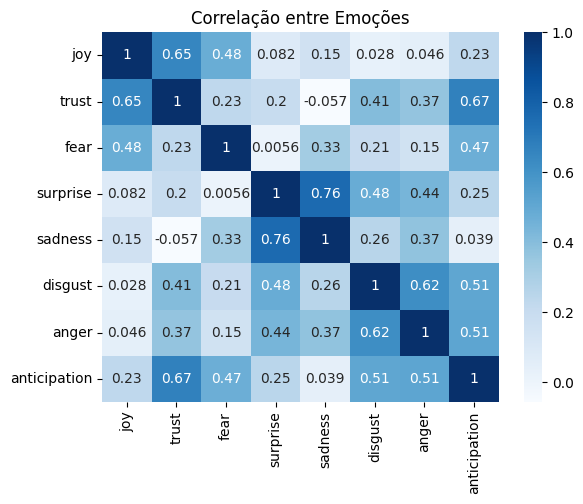

In [ ]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_727['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

## Análise da Era Fifth Harmony
Fifth Harmony é o terceiro e último álbum de estúdio auto-intitulado do girl group. Ele foi lançado em 25 de agosto de 2017, este foi o último álbum lançado antes do grupo anunciar o seu hiato através das gravadoras Syco Music e Epic Records. Esse álbum é marcado por ser o primeiro sem Camila Cabello desde sua saída do grupo em dezembro de 2016. Durante o processo criativo, os membros tiveram mais envolvimento, co-escrevendo a maioria das músicas, escolhendo quais produzir e compartilhar idéias durante a produção.  O grupo colaborou com vários produtores de discos e compositores, incluindo The Stereotypes, Skrillex, Poo Bear, The Monsters e Strangerz, Ester Dean, Ammo e DallasK, Dreamlab, Harmony Samuels e Tommy Brown.

Fifth Harmony estreou no número quatro na Billboard 200, com vendas de 46 mil unidades equivalentes de álbuns de acordo com a Nielsen SoundScan. Alcançou o mesmo pico do 7/27, tornando-se o quarto álbum consecutivo Top dez de Fifth Harmony e o terceiro top cinco, igualando o número de 10 melhores conjuntos de atos femininos Destiny's Child e Dixie Chicks. Eles estão atrás do The Supremes, que conseguiu oito dez melhores álbuns. Em termos de vendas puras, o álbum foi a segunda entrada mais alta no gráfico na semana de sua estréia, com 32 mil cópias puras vendidas. Na Coréia do Sul, o álbum estreou no número 97 no Gaon Album Chart e no número 10 no gráfico internacional para suas cópias físicas. No Japão, o álbum estreou no número 70 no Hot Albums de Billboard Japan por suas cópias digitais.

Mais informações no link: https://pt.wikipedia.org/wiki/Fifth_Harmony_(%C3%A1lbum)

In [ ]:
# Filtrando o DataFrame pelo álbum Fifth Harmony
df_fh = df_original_2[df_original_2['Album'] == 'Fifth Harmony']

# Exibindo o DataFrame filtrado
df_fh

title                                             lyrics  \
2                    Down  gucci mane gucci fifth harmony need somebody p...   
5            He Like That  pumps bump pumps bump good attitude kinda like...   
6   Don’t Say You Love Me  miss when call hurting without scars promise t...   
7                   Angel  said angel said angel moment nothin serious ne...   
15                Deliver  know keep ready regular ready settin when give...   
22           Lonely Night  attention better listen cause questions late n...   
25                Bridges  spend time rewind sorry many times remind myse...   
26              Sauced Up  sauced forever young never cause sauced like w...   
28           Make You Mad  make make blood veins work baby baby know what...   
30                  Messy  tell straight feel filter touchin there filter...   

            Album  release_year  Word Count     score     sentiment   filter  
2   Fifth Harmony          2017         248  0.680233  anticipation  intenso  
5   Fifth Harmony          2017         294  0.046512      surprise  intenso  
6   Fifth Harmony          2017         180  0.523256           joy  intenso  
7   Fifth Harmony          2017         190  1.000000  anticipation  intenso  
15  Fifth Harmony          2017         273  0.598837         trust  intenso  
22  Fifth Harmony          2017         244 -1.000000         anger  intenso  
25  Fifth Harmony          2017         232  0.593023           joy  intenso  
26  Fifth Harmony          2017         250  0.627907         trust  intenso  
28  Fifth Harmony          2017         181  0.540698           joy  intenso  
30  Fifth Harmony          2017         178  0.244186       disgust  intenso

In [ ]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_fh['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1886 palavras no dataset de letra.
Existem 405 palavras únicas no dataset de letras.


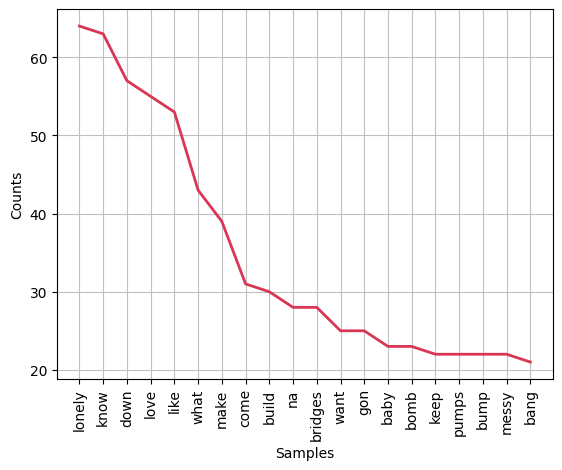

In [ ]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

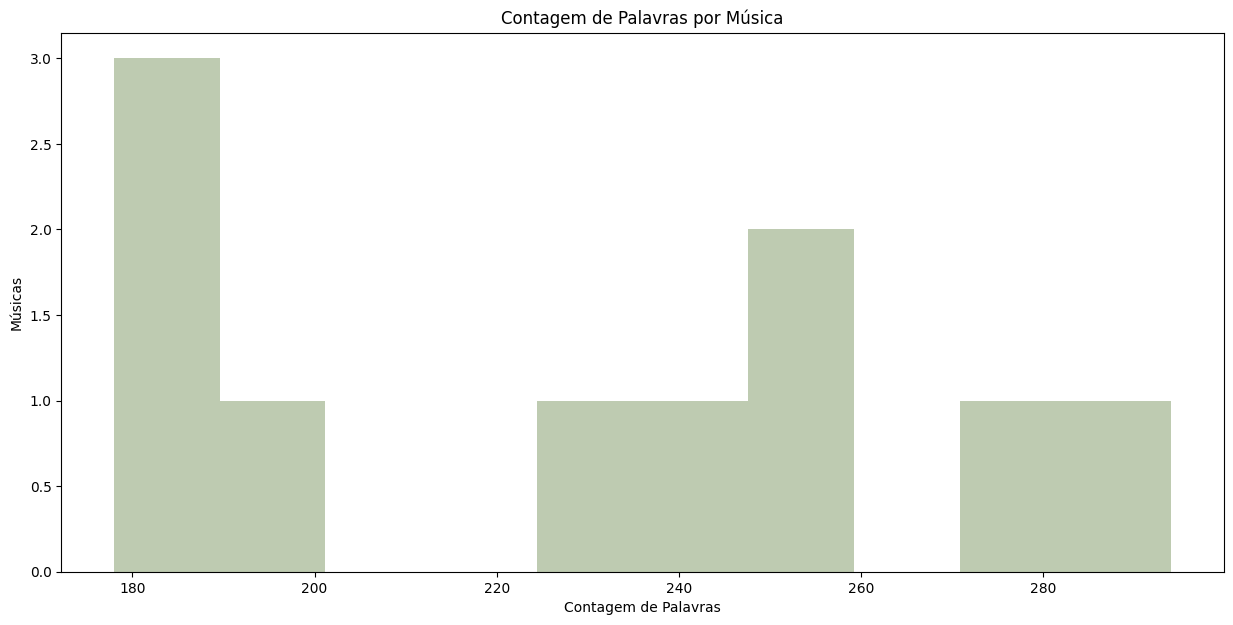

In [ ]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_fh
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_fh['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

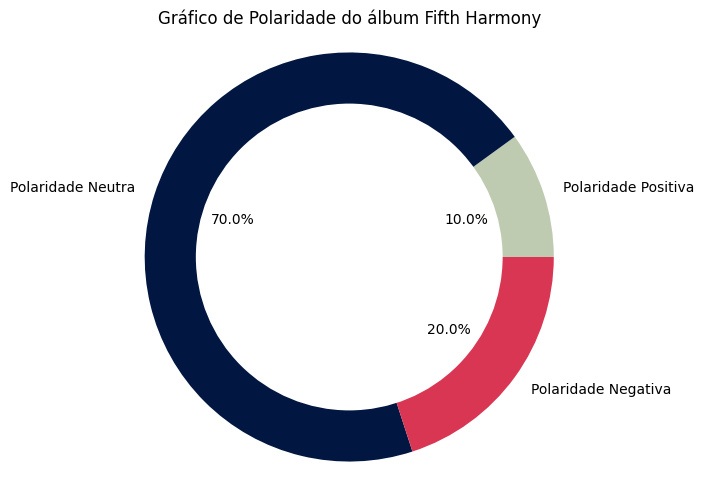

In [ ]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_fh['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_fh['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Fifth Harmony')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Mesmo sendo o último álbum lançado pelo grupo, nele percebemos mudança de direcionamento estratégico devido a saída de uma das integrantes. O álbum claramente contribui para a polaridade negativa da discografia geral.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-266-20a4179194b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fh['lyrics'] = df_fh['lyrics'].fillna('')  # Substitui valores nulos por string vazia


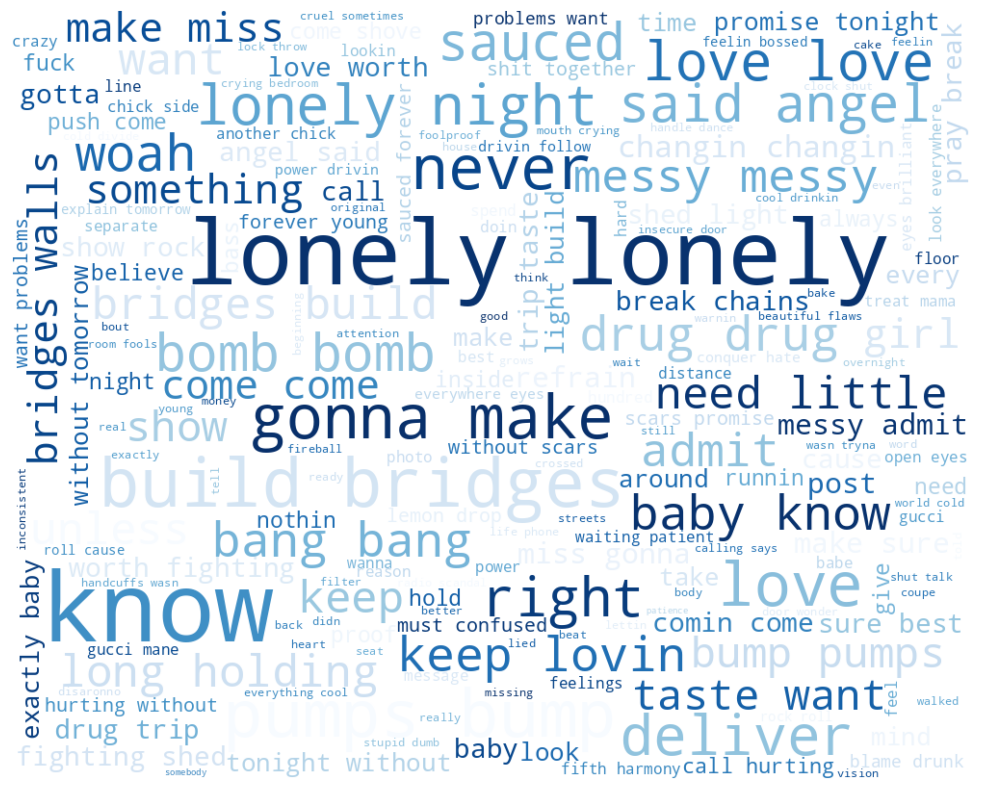

In [ ]:
# Exibir os nomes das colunas do DataFrame
print(df_fh.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_fh.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_fh['lyrics'] = df_fh['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_fh['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

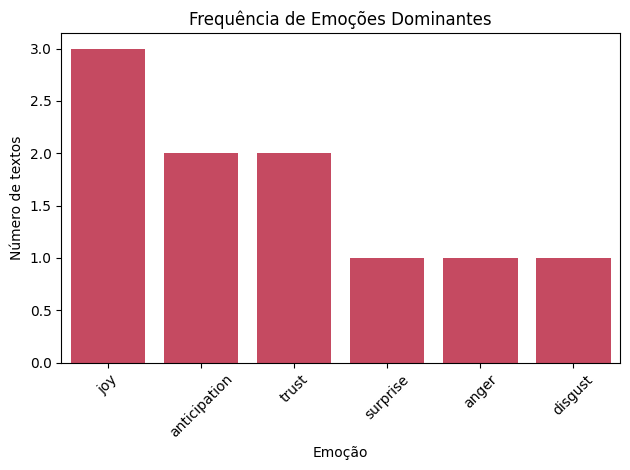

In [ ]:
## Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_fh,
    order=df_fh['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

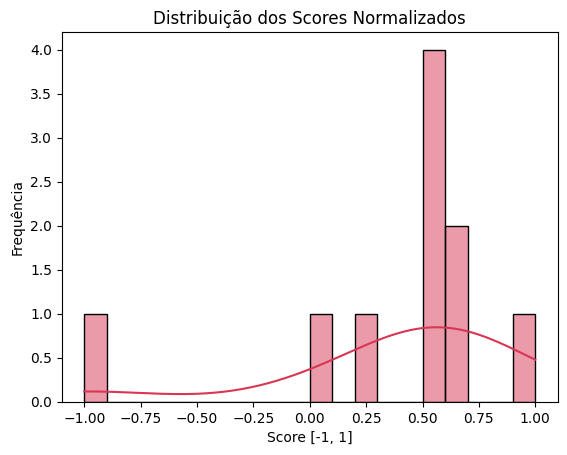

In [ ]:
# Construção do Histograma
sns.histplot(df_fh['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    álbum com forte equilíbrio emocional, atingindo ápices tanto da polaridade negativa como polaridade positiva sendo uma carcaterística comum de álbuns maduros do mercado.
</div>

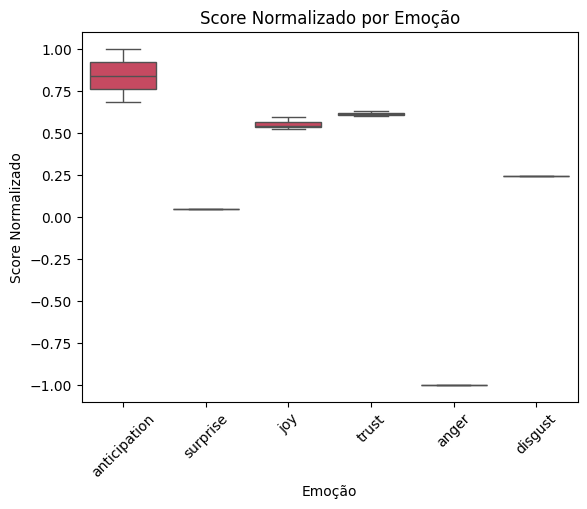

In [ ]:

sns.boxplot(x='sentiment', y='score', data=df_fh, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

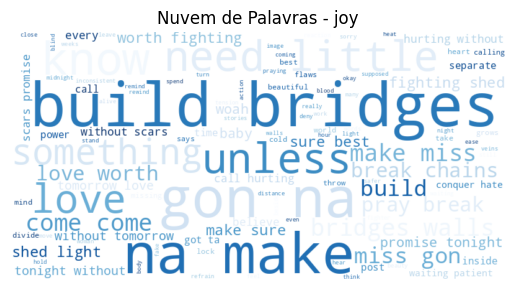

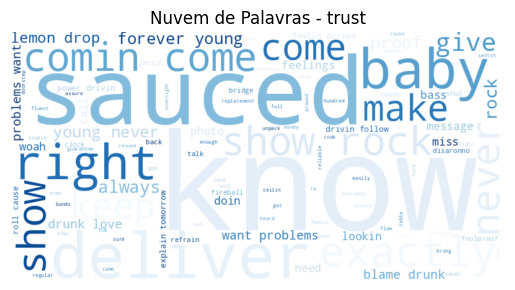

Nenhuma letra encontrada para a emoção 'fear'.


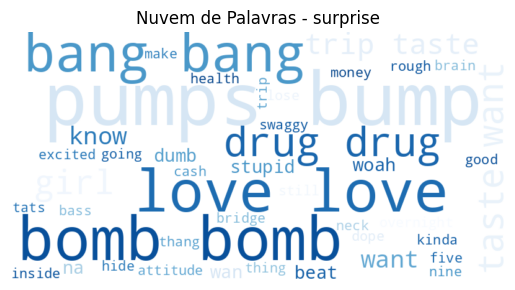

Nenhuma letra encontrada para a emoção 'sadness'.


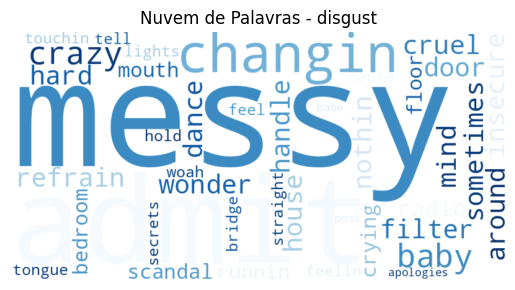

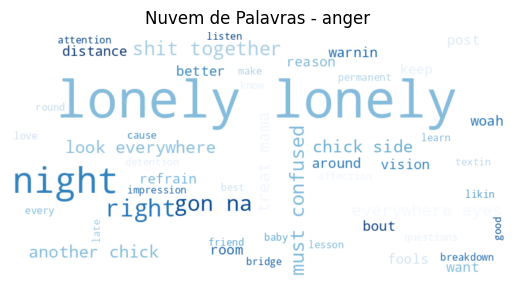

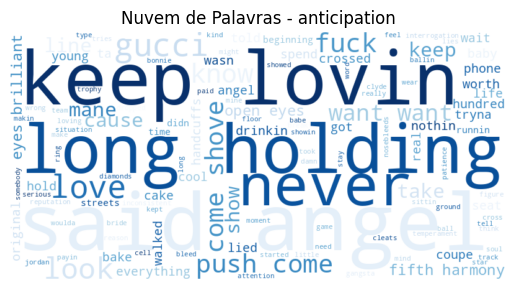

In [ ]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_fh[df_fh['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

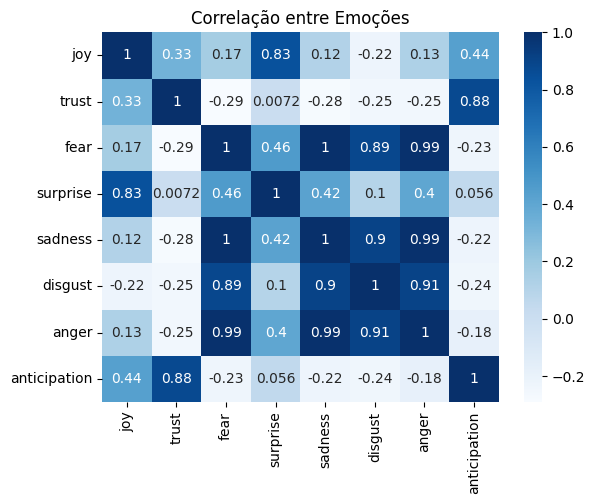

In [ ]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_fh['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

Com base no mapa de calor, é possível concluir que no álbum, as emoções negativas como *fear*, *disgust*, *sadness* e *anger* estão fortemente correlacionadas entre si (valores próximos de 1), indicando uma presença consistente de sentimentos intensos nas letras. Já as emoções positivas, como *joy* e *anticipation*, se destacam por sua forte correlação com *trust*. O álbum **7/27** apresenta uma divisão clara entre emoções positivas e negativas, sendo marcado por intensidade emocional e dualidade lírica nas músicas.

## Músicas Oficiais da Girl Band

In [ ]:
# Filtrando o DataFrame para excluir músicas dos álbuns Reflection, 7/27 e Fifth Harmony
df_songs = df_original_3[~df_original_3['Album'].isin(['Reflection', '7/27', 'Fifth Harmony'])]

# Exibindo o DataFrame filtrado
df_songs

title                                             lyrics     Album  \
36  Can You See  searchin somethin somethin that bigger believe...  The Star   

    release_year  Word Count    score sentiment   filter  
36          2017         155  0.77907     trust  intenso

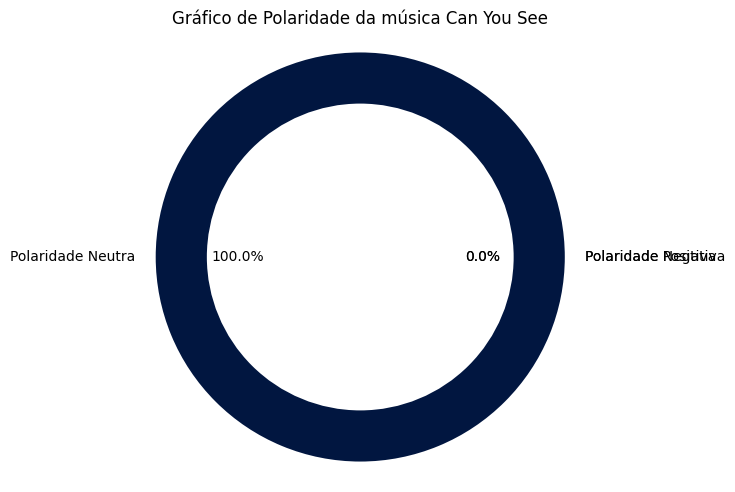

In [ ]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_songs['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_songs['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade da música Can You See')
plt.axis('equal')
plt.show()